**Importing Necessary Libraries**

In [2]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns #plot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn import metrics

**Data Processing and Visualization**

In [3]:
df = pd.read_csv('/content/cardio_train.csv',sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


**Check if there is null colums**

In [4]:
df.isnull().values.any()

False

In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


**Cleaning Data**

In [8]:
df.drop('id',axis=1,inplace=True)

In [9]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [10]:
df['gender'].value_counts()

,count
gender,
1,45530
2,24470


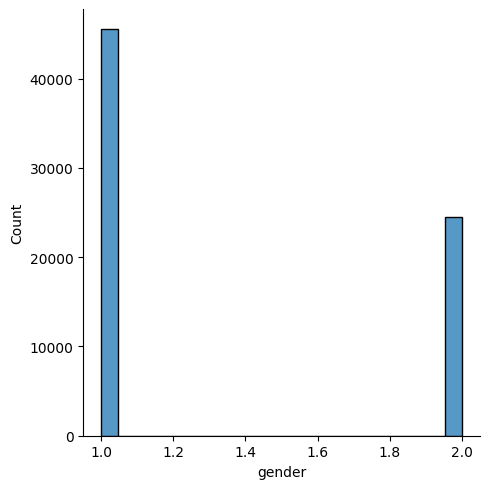

In [11]:
sns.displot(df["gender"])

**Disease Frequency for each Gender**

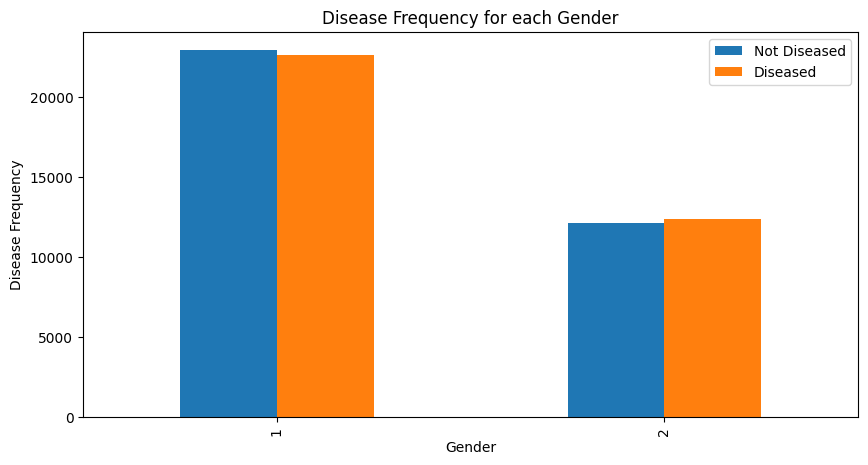

In [12]:
pd.crosstab(df.gender, df.cardio).plot(kind='bar', figsize=(10,5))
plt.title('Disease Frequency for each Gender')
plt.ylabel('Disease Frequency')
plt.xlabel('Gender')
plt.legend(["Not Diseased", "Diseased"])

**Frequency of Diseased ones with rcParams**

<Axes: xlabel='gender', ylabel='count'>

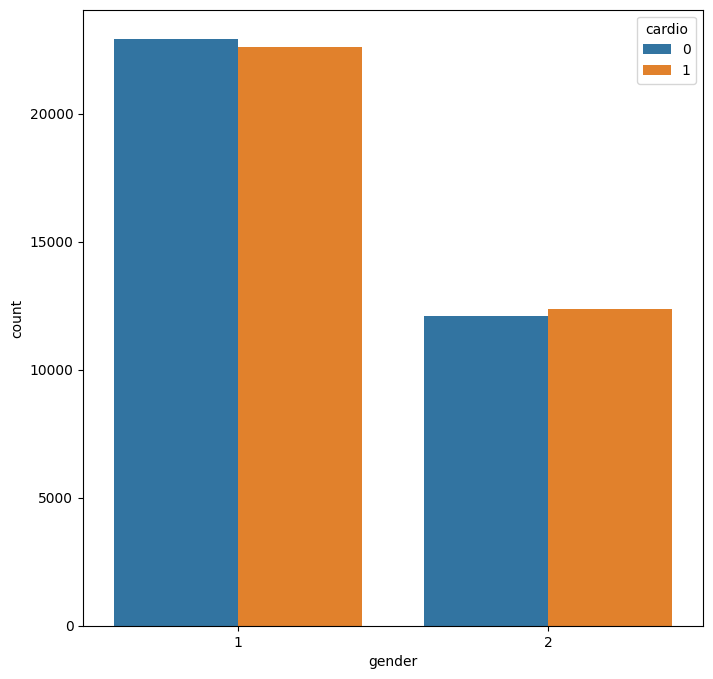

In [13]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,8
sns.countplot(x='gender',hue='cardio', data=df)

**Number of diseased people and not diseased**

In [14]:
df.cardio.value_counts()

,count
cardio,
0,35021
1,34979


**Calculate the number of woman and male were diseased**

In [15]:
diseased = (len(df[df.cardio==1])/len(df.cardio))*100
diseased_male= len(df[(df.cardio==1) & (df.gender==1)])/len(df.cardio)*100
diseased_female= len(df[(df.cardio==1) & (df.gender==2)])/len(df.cardio)*100
print("\n{:.2f}% of the total count were diseased \n amoung them {:.2f} women were diseased  \n and {:.2f} male were diseased ".format(diseased,diseased_female,diseased_male))


49.97% of the total count were diseased 
 amoung them 17.66 women were diseased  
 and 32.31 male were diseased 


**Calculate the number of woman and male were not diseased**

In [16]:
not_diseased = (len(df[df.cardio==0])/len(df.cardio))*100
non_diseased_male= len(df[(df.cardio==0) & (df.gender==1)])/len(df.cardio)*100
non_diseased_female= len(df[(df.cardio==0) & (df.gender==2)])/len(df.cardio)*100
print("\n{:.2f}% of the total count were not diseased \n amoung them {:.2f} women were not diseased  \n and {:.2f} male were diseased ".format(not_diseased,non_diseased_female,non_diseased_male))


50.03% of the total count were not diseased 
 amoung them 17.30 women were not diseased  
 and 32.73 male were diseased 


**Frequency of Cardiovascularity Disease by AGE**

<Axes: xlabel='cardio', ylabel='age'>

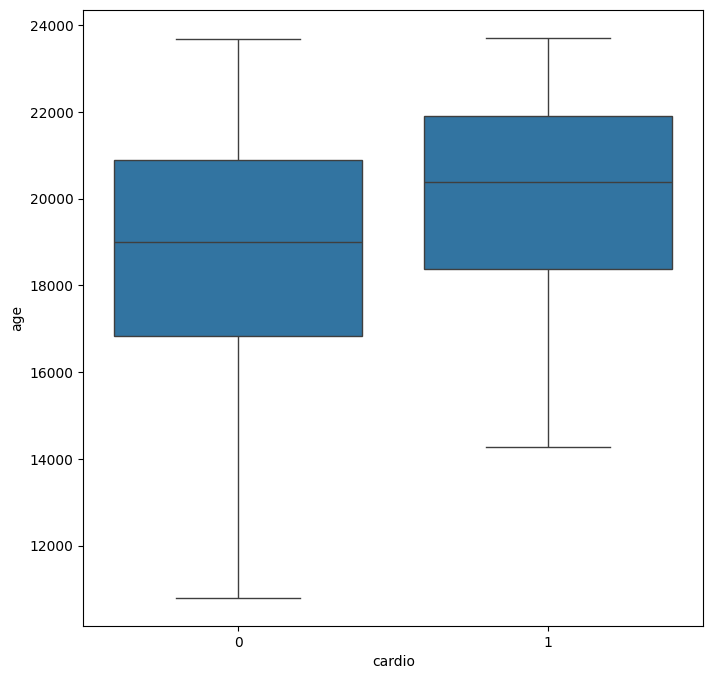

In [17]:
sns.boxplot(x='cardio',y='age',data=df)

**Distribution of people by Age & group by Category**

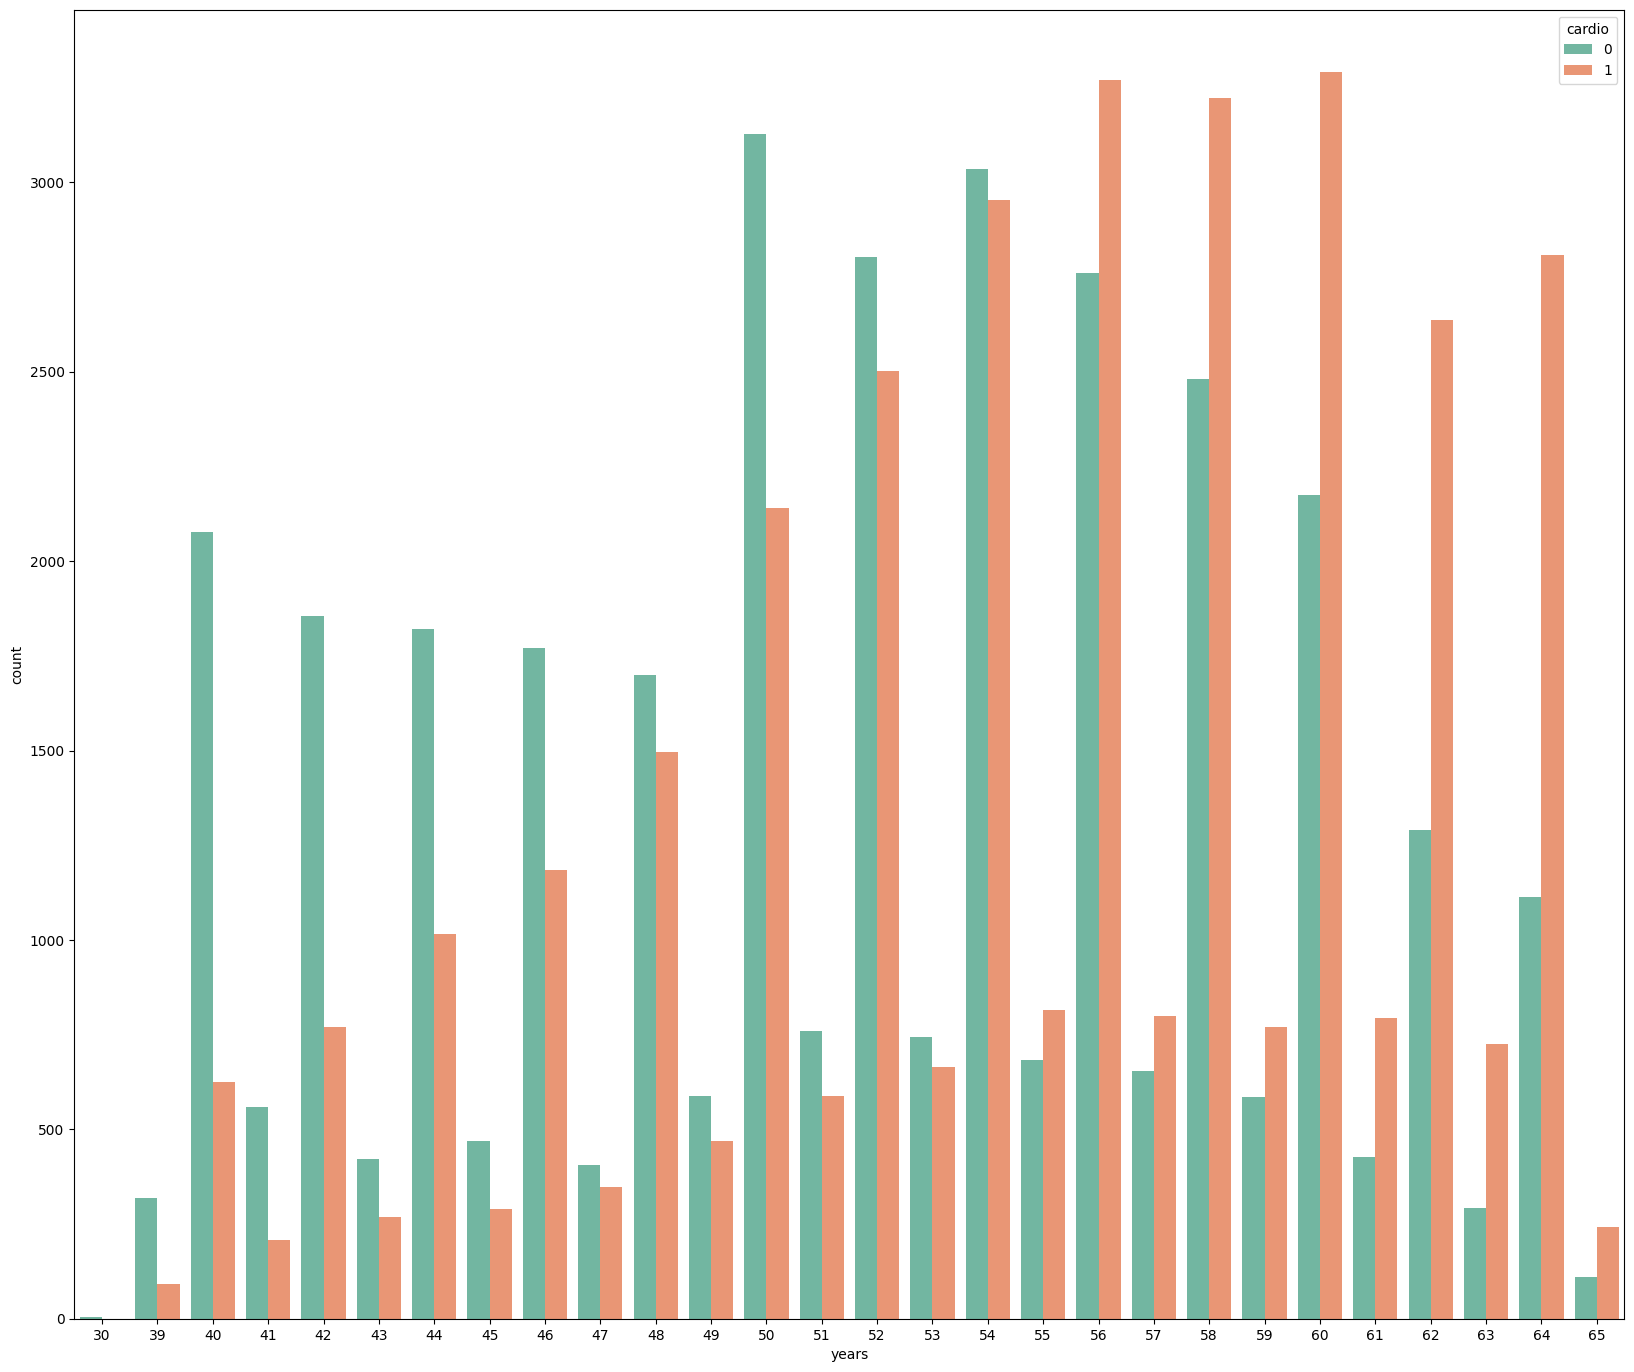

In [18]:
from matplotlib import rcParams
rcParams['figure.figsize']= 20, 17
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data=df, palette="Set2");

**Get Description**

In [19]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


**We can see there is outliers ap_hi,ap_lo,height,weight** SO WE NEED TO
**Remove weights and heights where fall below 2.5% or over 97.5%**

In [20]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.250))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.250))].index,inplace=True)

**Show Height and Weight after Dropping the outliers values**

<Axes: xlabel='cardio', ylabel='weight'>

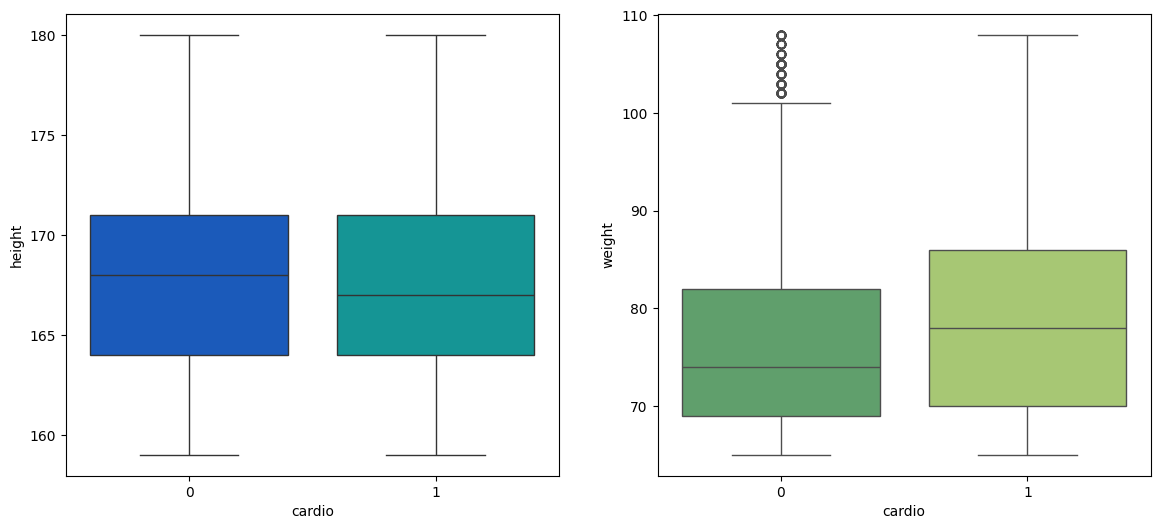

In [21]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='height',data=df,hue='cardio',palette='winter',legend=False)
plt.subplot(1,2,2)
sns.boxplot(x='cardio',y='weight',data=df,hue='cardio',palette='summer',legend=False)

**Remove ap_hi and ap_lo, that fall below 2.5% or above 97.5%**

In [22]:
print('Diastilic pressure is higher than systolic one in {0} cases'.format(df[df['ap_lo']>df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 706 cases


**Let's Get rid of outliers!!!**

In [23]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.250))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.250))].index,inplace=True)

**Checking if the operation of dropping is done or not**

Diastilic pressure is higher than systolic one in 0 cases


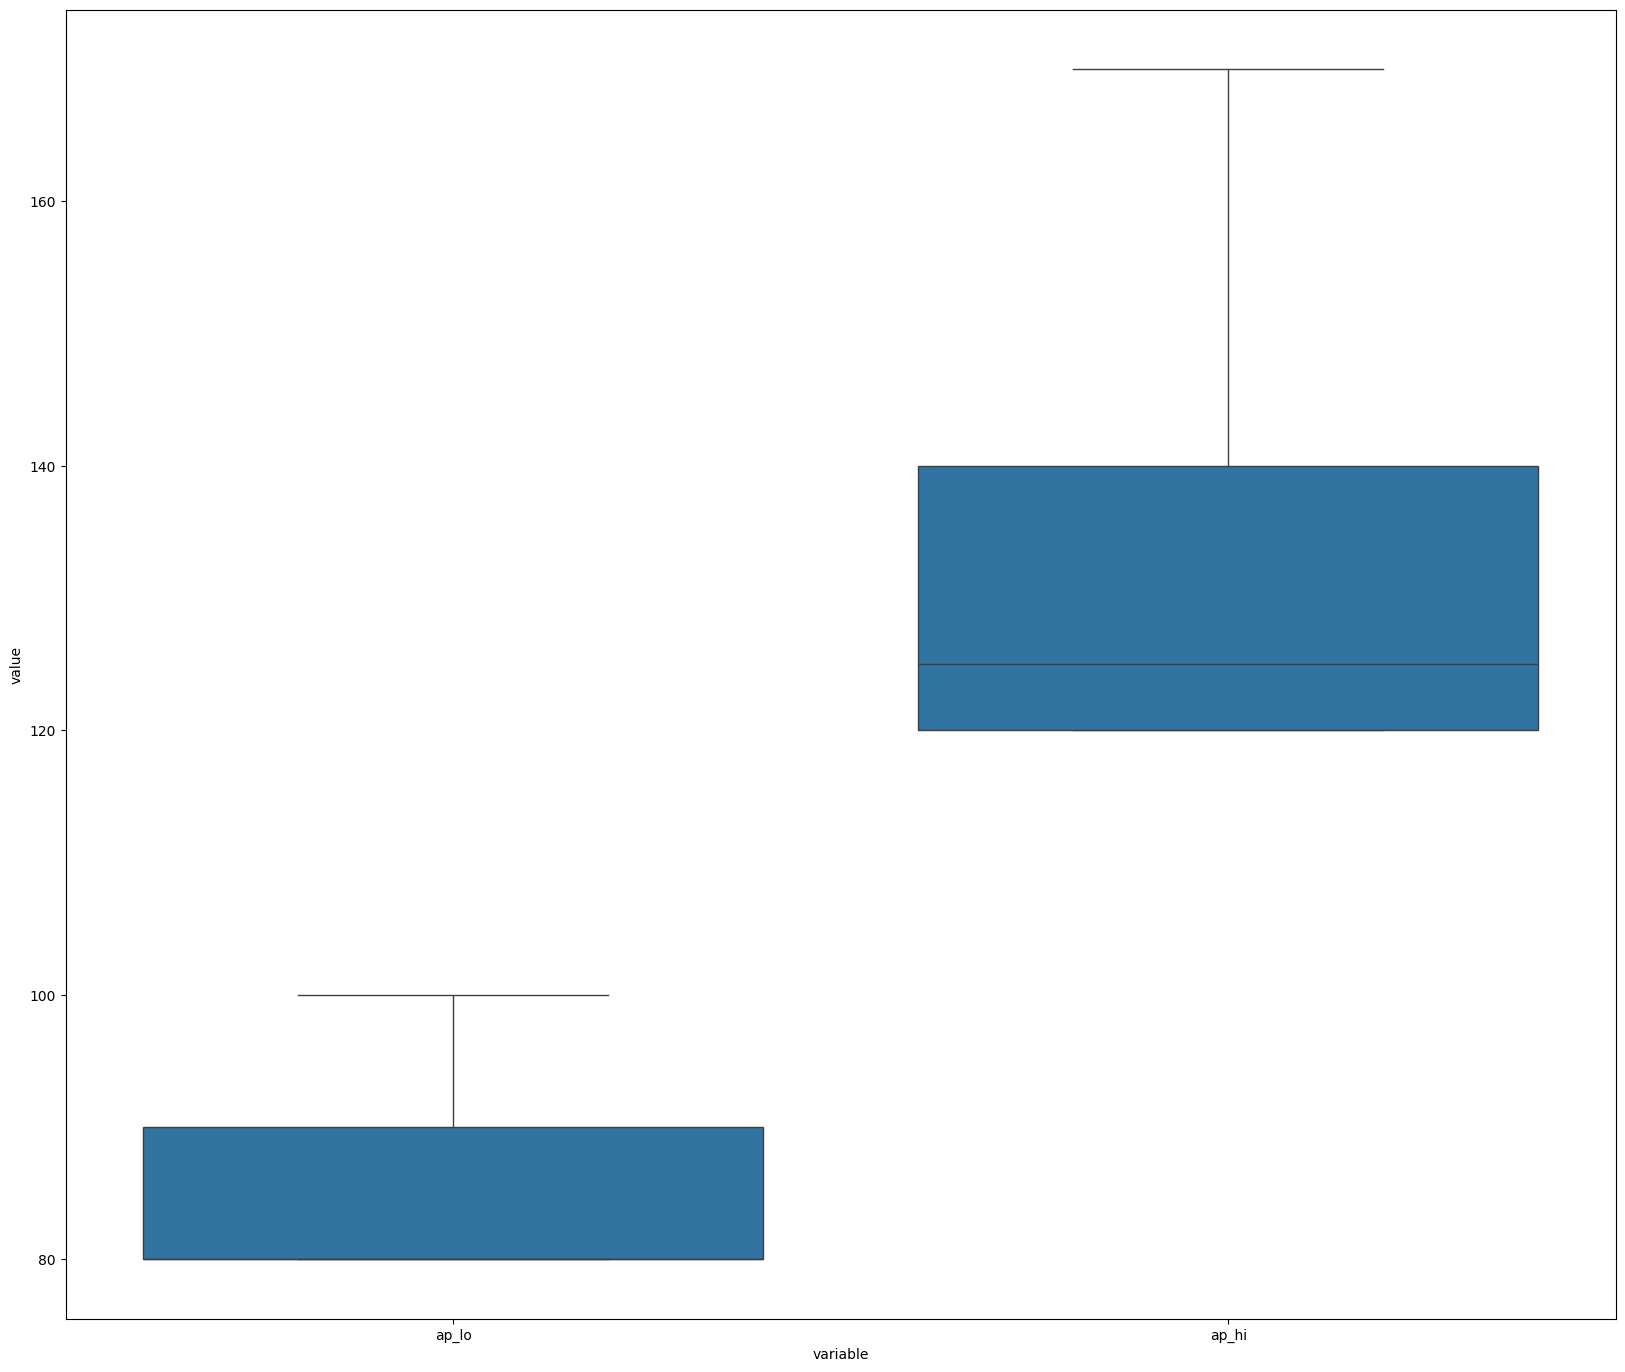

In [24]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x='variable', y='value', data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']>df['ap_hi']].shape[0]))

**Calculating the number of alcolic ones**

In [25]:
df.groupby('gender')['alco'].sum()

,alco
gender,
1,417
2,1470


**Now we need to calculate the Body Mass Index (BMI) value**

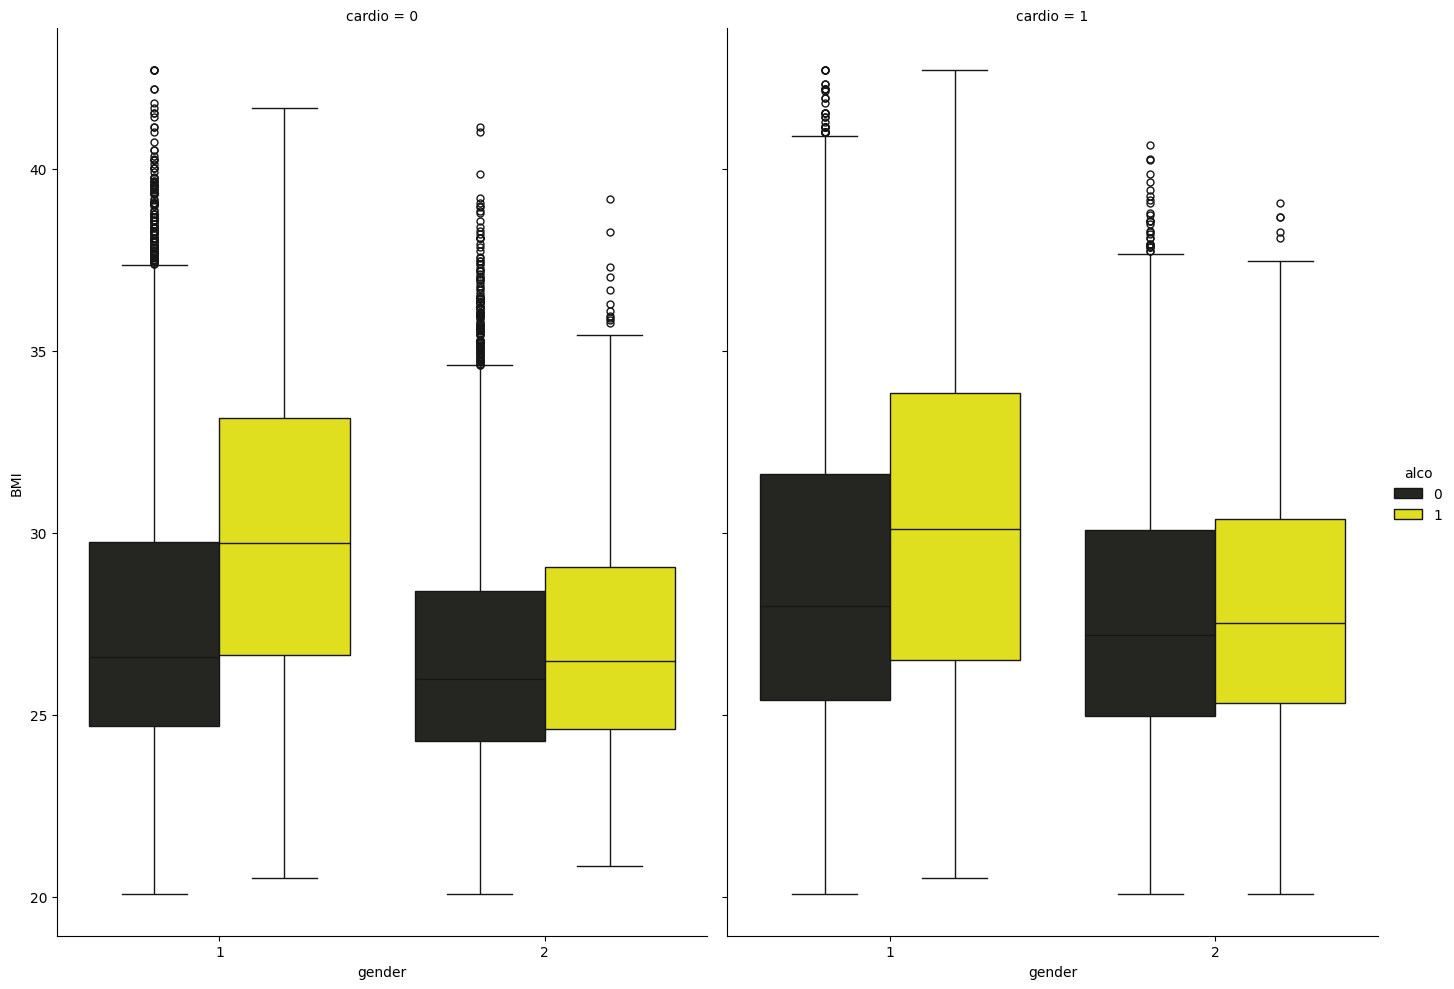

In [26]:
df['BMI']= df['weight']/((df['height']/100)**2)
sns.catplot(
    x='gender',
    y='BMI',
    hue='alco',
    col='cardio',
    data=df,
    palette='dark:yellow',
    kind="box",
    height=10,
    aspect=.7
)


**Outshowing the Heatmap**

In [27]:
# Calculer la matrice de corrélation
corr = df.corr()

# Définir la palette de couleurs
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Générer un masque pour le triangle supérieur
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Vérification
print(mask)


[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True]
 [False  True  True  True  True  True  True  True  True  True  True  True
   True  True]
 [False False  True  True  True  True  True  True  True  True  True  True
   True  True]
 [False False False  True  True  True  True  True  True  True  True  True
   True  True]
 [False False False False  True  True  True  True  True  True  True  True
   True  True]
 [False False False False False  True  True  True  True  True  True  True
   True  True]
 [False False False False False False  True  True  True  True  True  True
   True  True]
 [False False False False False False False  True  True  True  True  True
   True  True]
 [False False False False False False False False  True  True  True  True
   True  True]
 [False False False False False False False False False  True  True  True
   True  True]
 [False False False False False False False False False False  True  True
   True  True]
 [False False False F

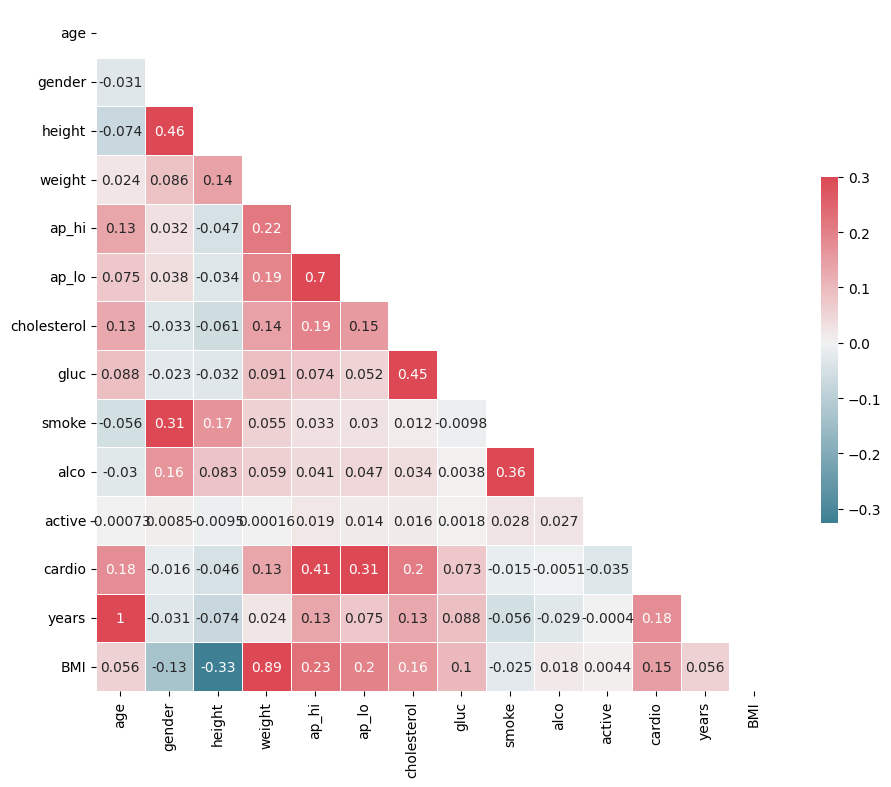

In [28]:
#Setup the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))
#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=.3,
    center=0,
    annot=True,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink":.5});

<function matplotlib.pyplot.show(close=None, block=None)>

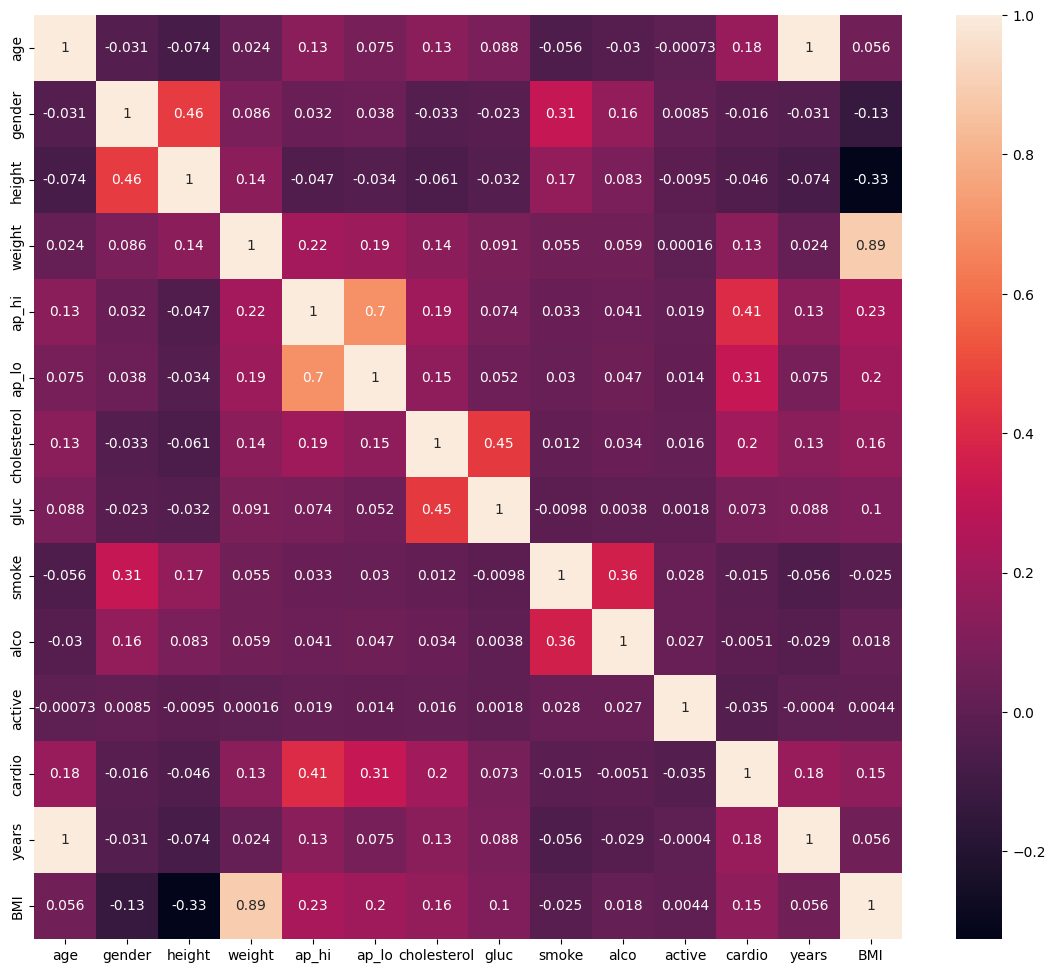

In [29]:
sns.heatmap(df.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(14,12)
plt.show

**ML using KNN(K-Nearest-Neighbours)**

In [30]:
x=df[['weight','ap_hi','ap_lo','cholesterol','years','BMI']]
y=df['cardio'].values
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.35,random_state=40)

In [31]:
Classifiers = list()

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_x,train_y)
y_pred_KN = knn.predict(test_x)
accuracy = knn.score(test_x,test_y)

In [33]:
print(f"KNN Accuracy: {accuracy:.2f}")

KNN Accuracy: 0.62


**This accuracy might lead us to an overfitting problem so to solve this problem we need to augment the number of n_neighbors**

In [34]:
max1 = 0
k = 0
for j in range (2,31):
    knn = KNeighborsClassifier(j)
    knn.fit(train_x,train_y)
    y_pred_KN = knn.predict(test_x)
    accuracy = knn.score(test_x,test_y)
    if(accuracy > max1):
        max1 = accuracy
        k = j

In [35]:
print(f"KNN Accuracy: {accuracy:.2f}")

KNN Accuracy: 0.71


In [36]:
knn = KNeighborsClassifier(k)
knn.fit(train_x,train_y)
y_pred_KN = knn.predict(test_x)
accuracy = knn.score(test_x,test_y)

In [37]:
print(f"KNN Accuracy: {accuracy:.2f}")

KNN Accuracy: 0.71


**We can say that we have a good accuracy up to 0.78 so we need to fix accuracy we need to use other algorithms like "Random Forest","Decision Tree", "Bagging Classifier", "Logistic Regression" instead of "KNN"**

In [41]:
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier()
DTR.fit(train_x,train_y)
y_pred_Deci = DTR.predict(test_x)
Classifiers.append(y_pred_Deci)

In [43]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=500,random_state=0)
RFC.fit(train_x,train_y)
y_pred_Rf = RFC.predict(test_x)
Classifiers.append(y_pred_Rf)

In [44]:
BAG = BaggingClassifier(n_estimators=140,random_state=222)
BAG.fit(train_x,train_y)
BAG_pred = BAG.predict(test_x)
Classifiers.append(BAG_pred)

In [45]:
logreg = LogisticRegression()
logreg.fit(train_x,train_y)
y_pred_log = logreg.predict(test_x)
Classifiers.append(y_pred_log)

**Let's see the accuracy of each algorithm and choose the one who has the highest one**

In [52]:
Class = ['KNeighbors','DecisionTree','RandomForest','BaggingClassifier','LogisticRegression']
score=list()
a=0
index=0
from sklearn.metrics import accuracy_score
for pred in range(len(Classifiers)):
  if a < accuracy_score(test_y,Classifiers[pred]):
    a=accuracy_score(test_y,Classifiers[pred])
    index=pred

  print("accuracy of {} classifier is {:.2f}".format(Class[pred],accuracy_score(test_y,Classifiers[pred])*100))
print("\nbest classifier is {} and the accuracy is {:.2f}%".format(Class[index],a*100))

accuracy of KNeighbors classifier is 63.02
accuracy of DecisionTree classifier is 68.07
accuracy of RandomForest classifier is 67.55
accuracy of BaggingClassifier classifier is 71.34

best classifier is BaggingClassifier and the accuracy is 71.34%


In [53]:
logreg = LogisticRegression()
logreg.fit(train_x,train_y)
pred_y = logreg.predict(test_x)
print(classification_report(test_y,pred_y))
print('accuracy = {:.2f}'.format(logreg.score(test_x,test_y)))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      4761
           1       0.76      0.70      0.73      5974

    accuracy                           0.71     10735
   macro avg       0.71      0.71      0.71     10735
weighted avg       0.72      0.71      0.71     10735

accuracy = 0.71


In [55]:
confusion_matrix = pd.crosstab(test_y,pred_y, rownames=['Actual'],colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,3447,1314
1,1763,4211


In [57]:
from sklearn.metrics import roc_auc_score
print('AUC = {:.2f}'.format(roc_auc_score(test_y,pred_y)))

AUC = 0.71


In [58]:
print('Confsuion Matrix =  \n\n', confusion_matrix)
print('\n \n\n Classification_report=\n \n', classification_report(test_y,pred_y))

Confsuion Matrix =  

 Predicted     0     1
Actual               
0          3447  1314
1          1763  4211

 

 Classification_report=
 
               precision    recall  f1-score   support

           0       0.66      0.72      0.69      4761
           1       0.76      0.70      0.73      5974

    accuracy                           0.71     10735
   macro avg       0.71      0.71      0.71     10735
weighted avg       0.72      0.71      0.71     10735



**And as you can see I've trained my model effectively**